In [16]:
import sys

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('../src')
import const

In [52]:
log_dir = const.LOG_DIR / 'lightgbm_007_20210306212804_1.0320'

In [53]:
oof = np.load(log_dir / 'oof.npy')
imp_df = pd.read_csv(log_dir / 'importance.csv')

train_df = pd.read_csv(const.INPUT_DATA_DIR / 'train.csv')

In [54]:
train_df['oof'] = oof

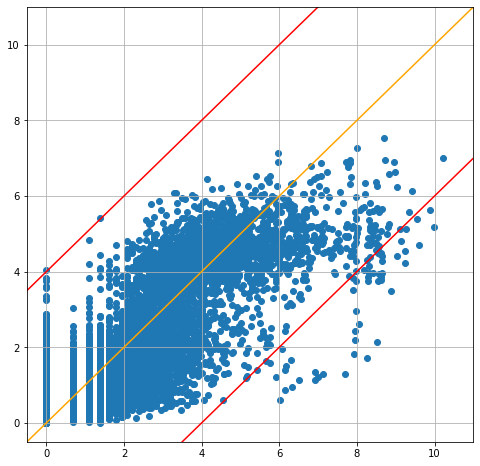

In [60]:
plt.figure(figsize=(8, 8))
plt.scatter(np.log1p(train_df['likes']), np.log1p(train_df['oof']))
plt.plot([-1, 12], [-1, 12], c='orange')

th = 4
plt.plot([-1, 12], [-1-th, 12-th], c='red')
plt.plot([-1, 12], [-1+th, 12+th], c='red')
plt.xlim([-0.5, 11])
plt.ylim([-0.5, 11])
plt.grid()

<AxesSubplot:xlabel='importance', ylabel='feature'>

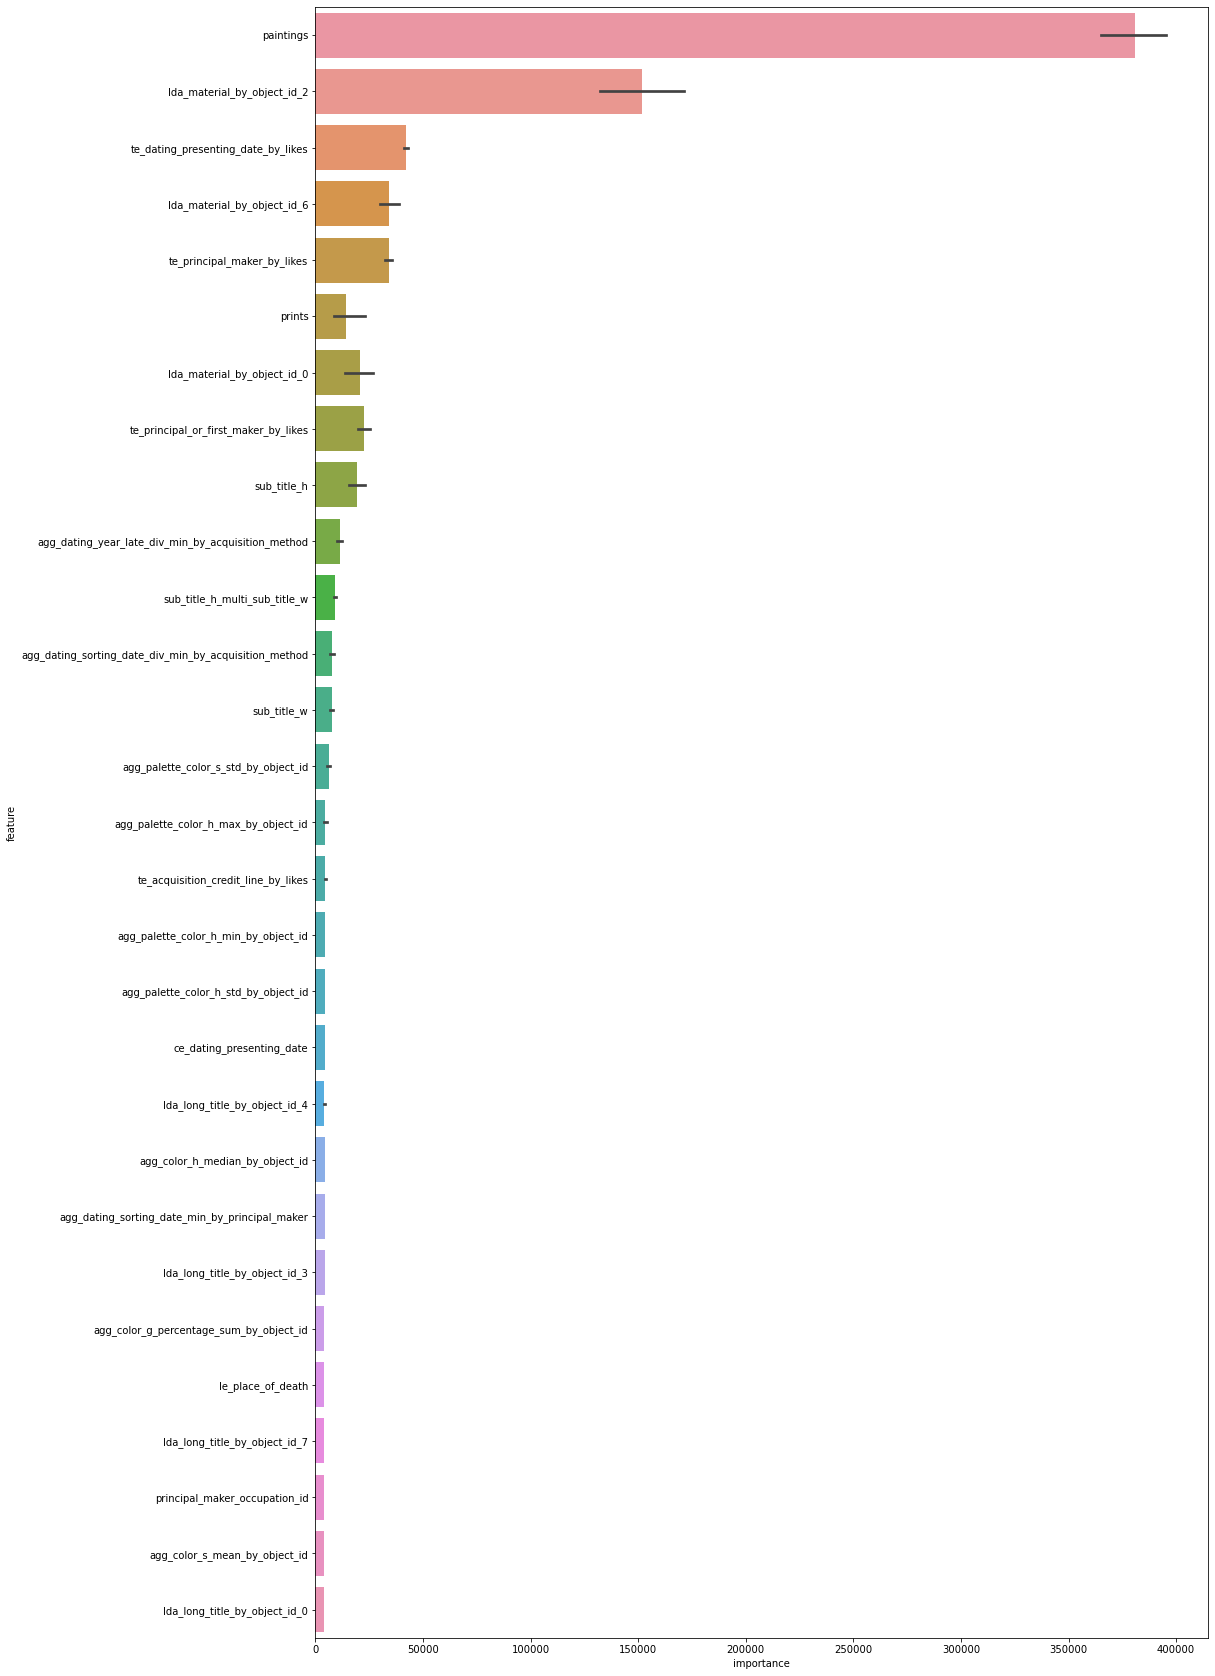

In [56]:
plt.figure(figsize=(16, 30))
sns.barplot(x='importance', y='feature', data=imp_df.sort_values(by='importance', ascending=False).head(100))

In [57]:
# a = imp_df.groupby('feature')['importance'].mean()
# cols = sorted(a[a > 0].index)
# for col in cols:
#     print(f'    - {col}')

In [58]:
train_df['diff'] = np.log1p(train_df['likes']) - np.log1p(train_df['oof'])

In [59]:
train_df[train_df['diff'] >= th][train_df['likes'] <= np.exp(8)]

<ipython-input-59-a131c36c0eb1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_df[train_df['diff'] >= th][train_df['likes'] <= np.exp(8)]


,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,...,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes,oof,diff
1457,1efef6318f993de9f3e9,bd6fbc65ad99d22e4a81,Gezicht op een school in de Jansstraat te Haarlem,NaN,Gezicht op een school in de Jansstraat te Haar...,anoniem (Monumentenzorg),"anoniem (Monumentenzorg), A.J.M. Mulder",h 231mm × w 173mm,NaN,Gezicht op een school in de Jansstraat te Haarlem,...,2018-01-01T00:00:00,NaN,c. 1873 - in or before 1888,1873.0,19,1873.0,1888.0,563,1.614624,5.373934
1504,2041f820c7d884498aa8,7da46c4af052f99dd645,Meisje met een liefdesbrief,Een meisje zit op een hek onder een boom en le...,"Meisje met een liefdesbrief, Antoine Cardon, 1798",Antoine Cardon,Antoine Cardon,h 320mm × w 224mm,NaN,Meisje met een liefdesbrief Credulity,...,1961-01-01T00:00:00,NaN,1798,1798.0,18,1798.0,1798.0,2221,2.672929,6.405174
1885,283076b246e68598aeb4,384ffa7ecdca8cf98d7b,Gezicht over Kopenhagen,NaN,"Gezicht over Kopenhagen, Jacob Olie jr., c. 19...",Jacob Olie jr.,Jacob Olie jr.,h 89mm × w 120mm,Jacob R. Olie,Gezicht over Kopenhagen,...,1995-01-01T00:00:00,NaN,c. 1913 - c. 1927,1913.0,20,1913.0,1927.0,2824,8.009187,5.748019
3385,48d4c7fe4f27d8d05749,bf702198f615d9a7efec,Wandelaar in het Haagse Bos,"Gezicht op een open plek in het Haagse Bos, me...","Wandelaar in het Haagse Bos, Roelant Roghman, ...",Roelant Roghman,Roelant Roghman,h 208mm × w 262mm,NaN,Wandelaar in het Haagse Bos Gezichten in het H...,...,1816-01-01T00:00:00,NaN,1637 - 1652,1637.0,17,1637.0,1652.0,463,1.375627,5.274623
3473,4a688af4e394025944d4,f0cdaf77d27771e31465,Interieur met het grafmonument van Willem I Fr...,NaN,Interieur met het grafmonument van Willem I Fr...,anoniem (Monumentenzorg),"anoniem (Monumentenzorg), A.J.M. Mulder",h 222mm × w 161mm,NaN,Interieur met het grafmonument van Willem I Fr...,...,2018-01-01T00:00:00,NaN,1911,1911.0,20,1911.0,1911.0,1005,2.131195,5.772323
3935,541f544fab4926123da3,aa01592866515c8c057b,Portret van een onbekende man,NaN,"Portret van een onbekende man, Richard Beard, ...",Richard Beard,Richard Beard,h mm × w mm,NaN,Portret van een onbekende man,...,1994-01-01T00:00:00,NaN,c. 1841 - c. 1850,1841.0,19,1841.0,1850.0,462,3.076489,4.732491
4569,6259b30c1969cf7ed1c7,54a6a33d30b6a5f0565b,"View of the Kolkje Canal, Amsterdam",NaN,"View of the Kolkje Canal, Amsterdam, Robert De...",Robert Demachy,Robert Demachy,h 214mm × w 148mm,NaN,NaN,...,1996-01-01T00:00:00,Purchased with the support of the VSBfonds,1907 - 1914,1907.0,20,1907.0,1914.0,2758,5.248913,6.090216
4712,65451044bc117e3d6716,87d14d9cb85c29a4a60c,Halfnaakte vrouw,NaN,"Halfnaakte vrouw, Sanne Sannes, 1965",Sanne Sannes,Sanne Sannes,NaN,Rob Sannes,Halfnaakte vrouw,...,1994-01-01T00:00:00,NaN,1965,1965.0,20,1965.0,1965.0,2823,10.497069,5.503817
4747,65ff8728ee32c42fad3d,892a9c5f10c1e876cb40,Het Plantsoen in Leiden,"Het Plantsoen in Leiden, voor een deel afgezet...","Het Plantsoen in Leiden, unknown, c. 1900",unknown,unknown,h 110mm × w 167mm,NaN,Het Plantsoen in Leiden,...,NaN,NaN,c. 1900,1900.0,19,1900.0,1900.0,675,2.128621,5.375601
5108,6d5b2b64c1514eec2c06,09611141a8e33f8b5018,Plattegrond van Den Haag,Plattegrond van Den Haag met daarop ingetekend...,"Plattegrond van Den Haag, Jacob de Gheyn (II),...",Jacob de Gheyn (II),Jacob de Gheyn (II),h 383mm × w 542mm,NaN,Plattegrond van Den Haag,...,1938-01-01T00:00:00,Purchased with the support of the F.G. Waller-...,1598,1598.0,16,1598.0,1598.0,539,4.295697,4.624675
